In [1]:
import pandas as pd

df = pd.read_csv("enriched_forage_dataset.csv")

In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type_Animal                   35000 non-null  object 
 1   Race                          35000 non-null  object 
 2   Age_Stade_Physiologique       35000 non-null  object 
 3   Objectif_Animal               35000 non-null  object 
 4   Conditions_Climatiques        35000 non-null  object 
 5   Besoins_UFL                   35000 non-null  float64
 6   Besoins_PDIN                  35000 non-null  float64
 7   Besoins_PDIE                  35000 non-null  float64
 8   RMIC_Seuil                    35000 non-null  float64
 9   Description_Fourrage          35000 non-null  object 
 10  Energie_KCAL                  35000 non-null  float64
 11  Proteines_G                   35000 non-null  float64
 12  Fibres_G                      35000 non-null  float64
 13  M

In [3]:
print(df.head())

  Type_Animal       Race Age_Stade_Physiologique  Objectif_Animal  \
0      Caprin     Alpine               Gestation  Production Lait   
1       Bovin  Limousine               Lactation  Production Lait   
2       Bovin   Holstein               Lactation  Production Lait   
3      Caprin     Alpine           Engraissement    Engraissement   
4      Caprin     Saanen               Lactation  Production Lait   

  Conditions_Climatiques  Besoins_UFL  Besoins_PDIN  Besoins_PDIE  RMIC_Seuil  \
0                Tempéré        0.978          97.8         120.3        11.7   
1                 Humide        2.653         245.7         280.1        15.5   
2                Tempéré        2.672         247.4         282.0        17.5   
3                Tempéré        1.135          91.4         121.1        11.1   
4                 Humide        1.306         134.7         157.5         8.2   

  Description_Fourrage  ...  PDIN_Fourrage  PDIE_Fourrage  Meets_Requirements  \
0    Ray_grass_an

In [5]:
print(df.isnull().sum())
print((df.isnull().sum() / len(df)) * 100)

Type_Animal                     0
Race                            0
Age_Stade_Physiologique         0
Objectif_Animal                 0
Conditions_Climatiques          0
Besoins_UFL                     0
Besoins_PDIN                    0
Besoins_PDIE                    0
RMIC_Seuil                      0
Description_Fourrage            0
Energie_KCAL                    0
Proteines_G                     0
Fibres_G                        0
Matiere_Seche_G                 0
UFL_Fourrage                    0
PDIN_Fourrage                   0
PDIE_Fourrage                   0
Meets_Requirements              0
Grass_vs_Legume                 0
Season_Type                     0
NDFD_30h                        0
TTNDFD                          0
Climate_Adjustment_Factor       0
Region_Suitability              0
Expected_Yield_Impact_lb_day    0
dtype: int64
Type_Animal                     0.0
Race                            0.0
Age_Stade_Physiologique         0.0
Objectif_Animal              

In [6]:
print(df.duplicated().sum())

0


📈 Descriptive Statistics:
        Besoins_UFL  Besoins_PDIN  Besoins_PDIE    RMIC_Seuil  Energie_KCAL  \
count  35000.000000  35000.000000  35000.000000  35000.000000  35000.000000   
mean       1.156576    104.566386    125.616349     13.354777   2317.596771   
std        0.406725     36.529716     41.085149      2.723078    417.761333   
min        0.525000     48.800000     60.000000      8.000000   1480.000000   
25%        0.850000     77.000000     94.400000     11.300000   2033.750000   
50%        1.081000     98.000000    119.500000     13.100000   2265.000000   
75%        1.374000    123.600000    147.900000     15.300000   2518.000000   
max        2.700000    250.000000    285.000000     23.200000   3840.000000   

        Proteines_G      Fibres_G  Matiere_Seche_G  UFL_Fourrage  \
count  35000.000000  35000.000000     35000.000000  35000.000000   
mean     136.527749    352.179277       890.869943      0.742913   
std       32.837460     65.477256        93.470530      0.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


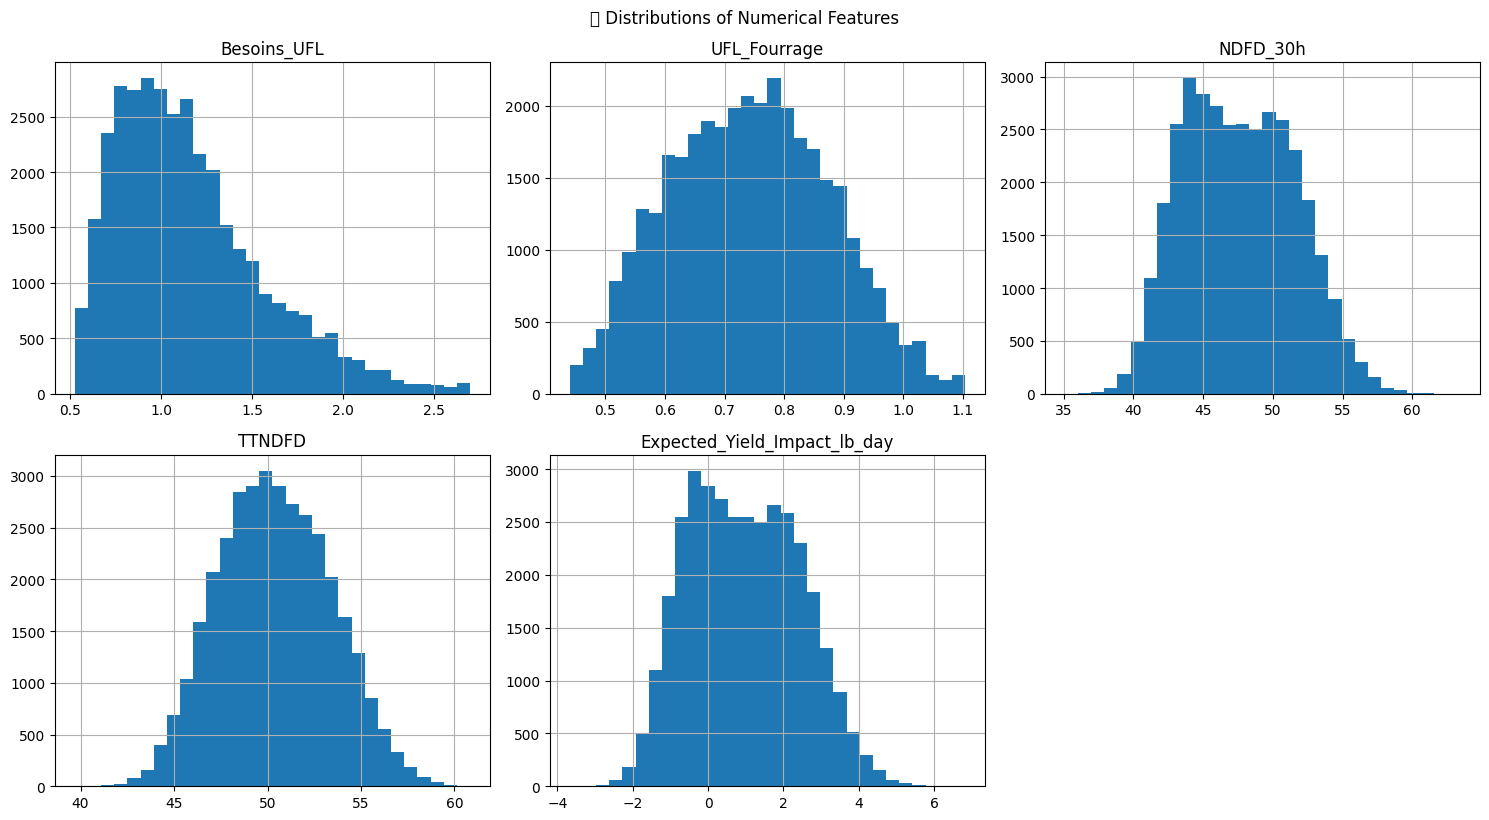

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 1. Summary statistics for numerical features
print("📈 Descriptive Statistics:")
print(df.describe())

# 🧮 2. Value counts for key categorical columns
print("\n📦 Forage Types:")
print(df['Description_Fourrage'].value_counts())

print("\n🐄 Animal Types:")
print(df['Type_Animal'].value_counts())

print("\n🎯 Production Goals:")
print(df['Objectif_Animal'].value_counts())

# 📉 3. Plot histograms for key numerical columns
numerical_cols = ['Besoins_UFL', 'UFL_Fourrage', 'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day']

df[numerical_cols].hist(bins=30, figsize=(15, 8), layout=(2, 3))
plt.tight_layout()
plt.suptitle("📊 Distributions of Numerical Features", y=1.02)
plt.show()


/tmp/ipython-input-8-2813641412.py:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


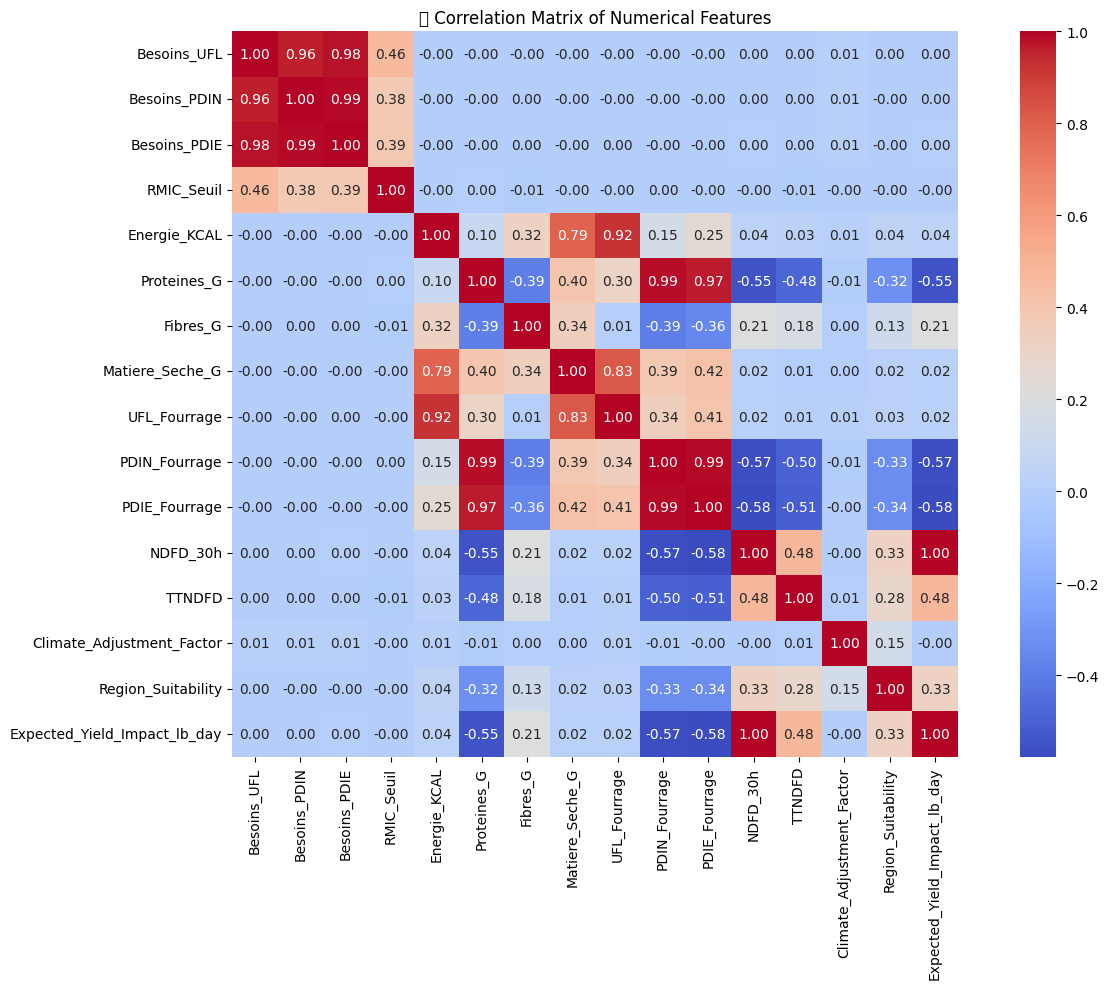

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("🔗 Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


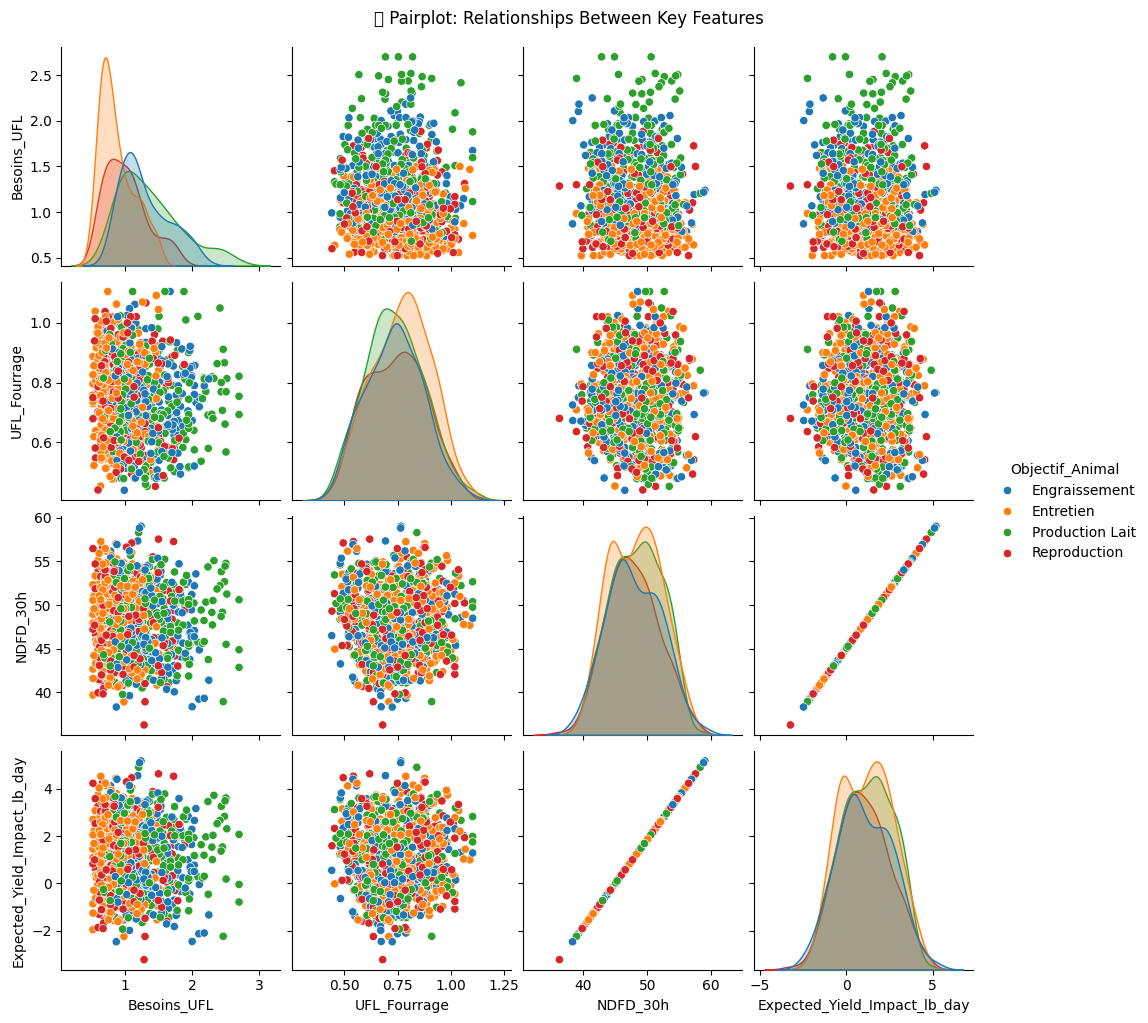

In [9]:
# You can use only a few key features to avoid heavy rendering
sample_df = df.sample(1000)  # reduce for performance

sns.pairplot(sample_df, vars=['Besoins_UFL', 'UFL_Fourrage', 'NDFD_30h', 'Expected_Yield_Impact_lb_day'], hue='Objectif_Animal')
plt.suptitle("🔍 Pairplot: Relationships Between Key Features", y=1.02)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


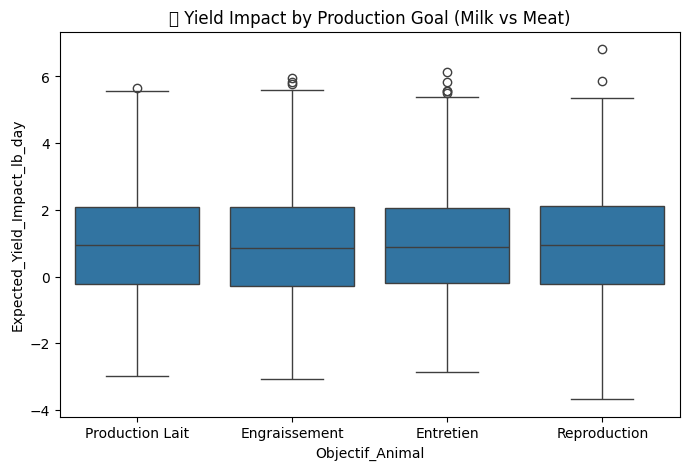

In [10]:
# Compare Expected Yield across production goals
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Objectif_Animal', y='Expected_Yield_Impact_lb_day')
plt.title("📦 Yield Impact by Production Goal (Milk vs Meat)")
plt.show()


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['Type_Animal', 'Race', 'Age_Stade_Physiologique', 'Objectif_Animal',
                    'Conditions_Climatiques', 'Description_Fourrage', 'Grass_vs_Legume',
                    'Season_Type']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show the new shape
print("✅ Encoded Data Shape:", df_encoded.shape)


✅ Encoded Data Shape: (35000, 45)


In [12]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = ['Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE',
            'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage',
            'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day',
            'RMIC_Seuil', 'Climate_Adjustment_Factor', 'Region_Suitability']

# Apply scaling
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Preview
df_encoded[num_cols].head()


,Besoins_UFL,Besoins_PDIN,Besoins_PDIE,UFL_Fourrage,PDIN_Fourrage,PDIE_Fourrage,NDFD_30h,TTNDFD,Expected_Yield_Impact_lb_day,RMIC_Seuil,Climate_Adjustment_Factor,Region_Suitability
0,-0.439065,-0.185232,-0.129400,1.212543,0.215048,0.168657,0.977422,1.282167,0.977422,-0.607695,-0.708350,1.048087
1,3.679259,3.863584,3.760139,-1.173830,-0.733028,-0.817337,0.497635,1.870792,0.497635,0.787805,1.411732,1.048087
2,3.725974,3.910122,3.806385,1.003081,-1.419418,-1.103593,1.091498,0.811045,1.091498,1.522278,-0.708350,1.048087
3,-0.053049,-0.360435,-0.109928,-1.637639,-1.213501,-1.321693,1.752902,0.313359,1.752902,-0.828037,-0.708350,1.048087
4,0.367389,0.824919,0.776049,-1.839621,-1.183471,-1.258080,0.425182,-0.359132,0.425182,-1.893024,1.411732,1.048087


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🏷️ Set target and features
X = df_encoded.drop(columns=['Meets_Requirements'])  # Features
y = df_encoded['Meets_Requirements']  # Target

# 📦 Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌲 Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🧪 Make predictions
y_pred = model.predict(X_test)

# 📊 Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.9888571428571429

📉 Confusion Matrix:
 [[4938   28]
 [  50 1984]]

📋 Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.99      0.99      4966
        True       0.99      0.98      0.98      2034

    accuracy                           0.99      7000
   macro avg       0.99      0.98      0.99      7000
weighted avg       0.99      0.99      0.99      7000



In [14]:
import numpy as np
import pandas as pd

# Define the input function
def recommend_forage(goal, climate, forage, model, reference_df, scaler):
    # Create a dummy input
    new_data = reference_df.iloc[0:1].copy()  # Copy structure
    new_data[:] = 0  # Reset values

    # Set values
    new_data['Objectif_Animal_' + goal] = 1
    new_data['Conditions_Climatiques_' + climate] = 1
    new_data['Description_Fourrage_' + forage] = 1

    # Get numeric columns used in training
    num_cols = ['Besoins_UFL', 'Besoins_PDIN', 'Besoins_PDIE',
                'UFL_Fourrage', 'PDIN_Fourrage', 'PDIE_Fourrage',
                'NDFD_30h', 'TTNDFD', 'Expected_Yield_Impact_lb_day',
                'RMIC_Seuil', 'Climate_Adjustment_Factor', 'Region_Suitability']

    # Fill numeric values with mean (or use real values if you have them)
    for col in num_cols:
        new_data[col] = reference_df[col].mean()

    # Scale numeric values
    new_data[num_cols] = scaler.transform(new_data[num_cols])

    # Predict
    prediction = model.predict(new_data)[0]

    if prediction:
        return f"✅ Recommended: '{forage}' is suitable for goal '{goal}' in climate '{climate}'"
    else:
        return f"❌ Not Recommended: '{forage}' does NOT meet the needs for goal '{goal}' in climate '{climate}'"

# Example usage:
print(recommend_forage(goal="Production Lait", climate="Tempéré", forage="Ray_grass_anglais", model=model, reference_df=df_encoded, scaler=scaler))


/tmp/ipython-input-14-490828114.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_data[:] = 0  # Reset values
/tmp/ipython-input-14-490828114.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_data[:] = 0  # Reset values
/tmp/ipython-input-14-490828114.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  new_data[:] = 0  # Reset values
/tmp/ipython-input-14-490828114.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has 

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Meets_Requirements
